<a href="https://colab.research.google.com/github/rogersm92/Machine_Learning/blob/main/Digit_Classification_using_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
Keras is an Open Source (MIT License / GNU) library written in Python that provides us powerful tools for Neural Networks.
<br></br>
In this tutorial I'll show how to build a **feedforward neural network** and train it to identify handwritten digits.
<br></br>
A **feedforward neural network** is an artificial neural network wherein **connections between the nodes do not form a cycle**. 



![](https://drive.google.com/uc?export=view&id=1mLfMcAQrJ62ONPhLqh6394T5eVW9FKXG)

Given an image of a handrwitten digit, our neural network will identify it.
Each image in the MNIST dataset is **28x28px** and contains a centered, grayscale digit.

In [30]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers

mnist = tf.keras.datasets.mnist # The MNIST database is a large database of handwritten digits that is commonly used for training various image processing systems
print(tf.__version__)

2.4.1


In [26]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data() 
# A feature is one column of the data in your input set, also known as X. -> x_train = train_images, x_test = test_images
# A label is the thing we're predicting, also known as Y. --> y_train = train_labels, y_test = test_labels

In [22]:
# Shape testing
# The shape of an array is the number of elements in each dimension.
myvector = np.array([1,2,3])
print(myvector.shape)
mymatrix = np.array([[1,2,3], 
                     [4,5,6]])
print(mymatrix.shape)
mytensor = np.array([[[1,2,3], 
                      [4,5,6], 
                      [7,8,9]],
                     
                     [[10,11,12], 
                      [13,14,15], 
                      [16,17,18]],
                     ])
print(mytensor.shape)

(3,)
(2, 3)
(2, 3, 3)


In [27]:
# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1) --> 28px x 28px
# NumPy arrays have an attribute called shape that returns a tuple with each index having the number of corresponding elements.
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [28]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [31]:
# Building the model
model = keras.Sequential(
    # A sequential model is a linear stack of layers.
    # Each layer has exactly one input tensor and one output tensor. 
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                1

In [32]:
# Training the model
batch_size = 128 # The batch size defines the number of samples that will be propagated through the network.
# For instance, let's say you have 1050 training samples and you want to set up a batch_size equal to 100. 
# The algorithm takes the first 100 samples (from 1st to 100th) from the training dataset and trains the network. 
# Next, it takes the second 100 samples (from 101st to 200th) and trains the network again. 
epochs = 15 # An epoch is a term used in machine learning and indicates the number of passes of the entire training dataset the machine learning algorithm has completed.
# In this case, the model will check the entire dataset 15 times, and if it were to overfit, it would stop and not complete all epochs.
# Overfitting occurs when your model learns too much from training data and isn't able to generalize the underlying information. Because of that, it can't make precise predictions and is only able to work with training data.

# An epoch contains all samples while batch size contains limited samples:
# - One Epoch is when an ENTIRE dataset is passed forward and backward through the neural network only ONCE.
# - Batch size: Total number of training examples present in a single batch.

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 36s 85ms/step - loss: 0.7511 - accuracy: 0.7709 - val_loss: 0.0813 - val_accuracy: 0.9783
Epoch 2/15
422/422 [==============================] - 36s 85ms/step - loss: 0.1177 - accuracy: 0.9641 - val_loss: 0.0541 - val_accuracy: 0.9862
Epoch 3/15
422/422 [==============================] - 36s 84ms/step - loss: 0.0842 - accuracy: 0.9750 - val_loss: 0.0472 - val_accuracy: 0.9872
Epoch 4/15
422/422 [==============================] - 35s 84ms/step - loss: 0.0685 - accuracy: 0.9786 - val_loss: 0.0401 - val_accuracy: 0.9892
Epoch 5/15
422/422 [==============================] - 37s 87ms/step - loss: 0.0599 - accuracy: 0.9816 - val_loss: 0.0376 - val_accuracy: 0.9898
Epoch 6/15
422/422 [==============================] - 37s 87ms/step - loss: 0.0547 - accuracy: 0.9826 - val_loss: 0.0367 - val_accuracy: 0.9910
Epoch 7/15
422/422 [==============================] - 36s 85ms/step - loss: 0.0490 - accuracy: 0.9845 - val_loss: 0.0333 - val_accuracy:

As the number of epochs increases, more number of times the weight are changed in the neural network and the curve goes from underfitting to optimal to overfitting curve.

In [33]:
# Evaluating the training model
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.023777900263667107
Test accuracy: 0.9919000267982483


[7 2 1 0 4 1 4 9 5 9]


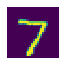

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


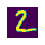

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


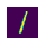

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


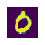

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


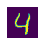

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


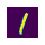

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


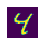

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


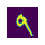

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


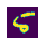

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


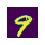

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [72]:
# Testing the model

import matplotlib.pyplot as plt


def predict_this_model(quantity):
    # Predict on the first images
    predictions = model.predict(x_test[:quantity])

    # Print our model's predictions.
    print(np.argmax(predictions, axis=1)) 

    # preview the images 
    plt.figure(figsize=(10,10))
    x, y = 10, 4
    for i in range(quantity):  
        plt.subplot(y, x, i+1)
        plt.imshow(x_test[i].reshape((28,28)),interpolation='nearest')
        plt.axis('off')
        plt.subplots_adjust(wspace=0.1, hspace=0.1)
        plt.show()
        print(y_test[i]) 


predict_this_model(10)

Each array has 10 positions, resembling a true or false array. Considering arrays start from index 0, it's the same as: 0, 1, 2, 3, 4, 5, 6, 7, 8, 9.
<br></br>
Therefore, we have to compare the handwritten digit to the index where 1 belongs in each case. In all 10 examples above, the model guessed correctly all predictions.
